In [ ]:
#! -*- coding: utf-8 -*-

# GWpyの概要
LIGO Open Data Workshop、2018のために書かれたGWpyのクイックスタートチュートリアルへようこそ

このチュートリアルでは、重力天体物理学のpythonパッケージであるGWpyと、これを使ってLOSCデータへのアクセスと処理を高速化する方法を簡単に説明します。

ノート：

 - このノートブックとこのシリーズの他のものは、python 3.5を使って生成されましたが、Python 2.7,3.4,3.5、および3.6で動作するはずです
 -  GWpyは現在、Windowsでは使用できません。ごめんなさい


## オブジェクト指向プログラミングに関するノート

あまりに深く掘り下げる前に、オブジェクト指向プログラミング（OOP）を素早く検討する価値があります。
GWpyは非常にオブジェクト指向です。つまり、GWpyを使用して実行するほとんどすべてのコードは、ある種のオブジェクトに基づいています。 `TimeSeries`。
私たちが使用するメソッド（関数）のほとんどは、単体ではなく、オブジェクトにアタッチされています。つまり、ドキュメントを読む必要はありません。

Pythonでのオブジェクト指向プログラミングの概要については、[Jeff Knuppのブログ記事](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/)を見てください.

## 公開されたデータの検索

`gwosc`モジュールを使ってLOSCで利用できるデータを問い合わせることができます。
次に行うべきことは、実際に開いているデータを読むことです。
天体物理学の重力波信号の最初の直接検出であるGW150914を取得しようとしましょう。


TimeSeries.fetch_open_dataメソッドを使用してhttps://losc.ligo.org から直接データをダウンロードできますが、GPS時刻を知る必要があります。イベントのGPS時刻を次のように照会することができます。

In [17]:
from gwosc.datasets import event_gps
gps = event_gps('GW150914')
print(gps)

1126259462.4


今度は、便宜のために整数を使用して、この時刻の周りの10秒間のGPSセグメントを構築することができます：

In [18]:
segment = (int(gps)-5, int(gps)+5)

フルデータをクエリできるようになりました。
この例では、識別子「H1」を使用して、LIGO-Hanford干渉計のデータを取得することを選択します。
私たちは、

-  「H1」  -  LIGO-Hanford
-  「L1」  -  LIGO-Livingston

に加えて、イベントの検出器ネットワークに応じて、次のいずれかを選択できます。

- 「G1」 -  GEO600
- 「K1」 -  KAGRA
- 「V1」 - (Advanced)Virgo
 

In [19]:
from gwpy.timeseries import TimeSeries
# data = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
data = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(data)

Fetched 1 URLs from https://losc.ligo.org for [1126259457 .. 1126259467)
Reading data... [Done]
TimeSeries([ -3.37408113e-19,  -3.60538427e-19,  -3.22327735e-19,
            ...,   1.52206625e-19,   1.58897479e-19,
              1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


`verbose = True`フラグをつけると、GWpyが与えられた時間間隔のデータを含むファイルを発見して、ダウンロードし、データをロードしたことがわかります。
TimeSeriesオブジェクトを作った後、ファイルは保存されないので、同じ呼び出しを次に実行するときに再びダウンロードされますが、同じ呼び出しを何度も繰り返すことがある場合は、 `cache = True`を使用してファイルをコンピューターにキャッシュします。

私たちはGW150914のために実際のLIGOデータをダウンロードしました！これらは、最初の重力波信号を発見した解析で使用された実際のデータです。

O2のイベントで同じ手順を試してみましょう。たとえばGW170817です。このイベントでは、`tag`キーワードを使用してデータセットを選択する必要があることを思い出してください。

In [20]:
gps = event_gps('GW170817')
segment = (int(gps) - 5, int(gps) + 5)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True, tag='CLN')
print(data)

Fetched 1 URLs from https://losc.ligo.org for [1187008877 .. 1187008887)
Reading data... [Done]
TimeSeries([ -3.37408113e-19,  -3.60538427e-19,  -3.22327735e-19,
            ...,   1.52206625e-19,   1.58897479e-19,
              1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


我々は今、GW170817の本物の、クリーニングされたLIGOデータをダウンロードしました！

動作確認の為、 `` hdata`` TimeSeriesの[`plot（）`](https://gwpy.github.io/docs/stable/timeseries/plot.html) メソッドを使ってプロットします。

<div class="alert alert-info">
このノートブックで何かをプロットするのは初めてであるので、ノートブック内で適切に動作するように `matplotlib`（プロットライブラリ）を設定する必要があります：
</div>

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

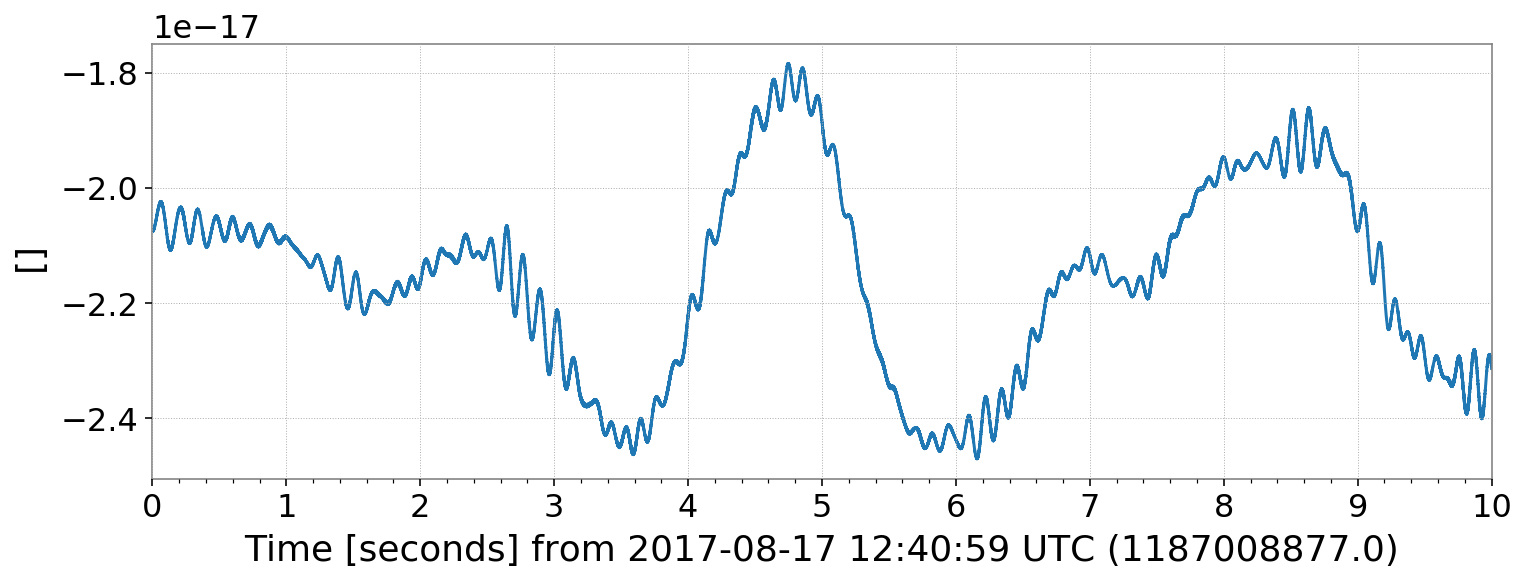

In [22]:
plot = hdata.plot()

## ローカルファイルを読む

`fetch_open_data（）`メソッドは、オンザフライでデータを取得するためにインターネット接続を必要とします。
場合によっては、データを手動でマシンにダウンロードしてローカルで読むことは非常に便利です。
これは、[`TimeSeries.read`](https://gwpy.github.io/docs/stable/timeseries/io.html) メソッドを使用します:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55.2M  100 55.2M    0     0  5529k      0  0:00:10  0:00:10 --:--:-- 6765k


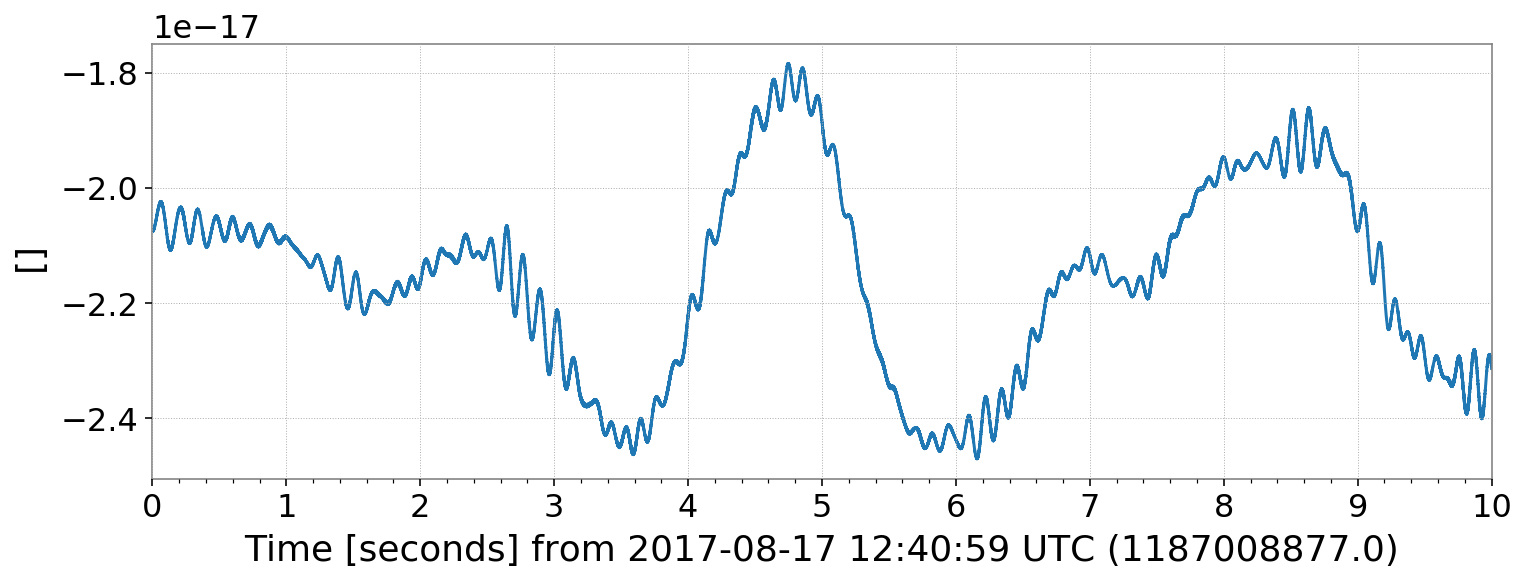

In [23]:
!curl -O https://losc.ligo.org//s/events/GW170817/H-H1_LOSC_CLN_4_V1-1187007040-2048.hdf5
hdata2 = TimeSeries.read('H-H1_LOSC_CLN_4_V1-1187007040-2048.hdf5', start=segment[0], end=segment[1], format='hdf5.losc')
plot2 = hdata2.plot()
plot2.show()

## 課題

 - GW170814周辺のVirgo検出器のデータをプロットする


Fetched 1 URLs from https://losc.ligo.org for [1186741856 .. 1186741866)
Reading data... [Done]
TimeSeries([ -3.37408113e-19,  -3.60538427e-19,  -3.22327735e-19,
            ...,   1.52206625e-19,   1.58897479e-19,
              1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


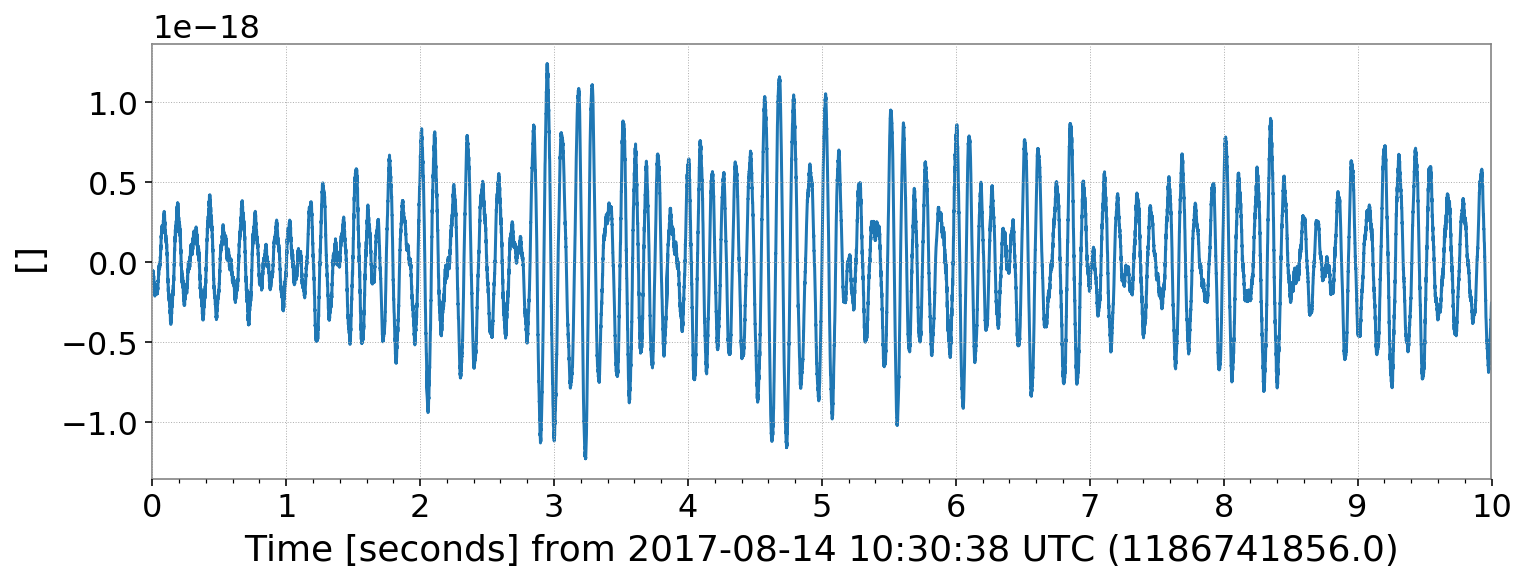

In [24]:
gps = event_gps('GW170814')
segment = (int(gps) - 5, int(gps) + 5)
hdata = TimeSeries.fetch_open_data('V1', *segment, verbose=True, cache=True, tag='CLN')
print(data)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plot = hdata.plot()

1186741861.53
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1012k  100 1012k    0     0   581k      0  0:00:01  0:00:01 --:--:--  581k


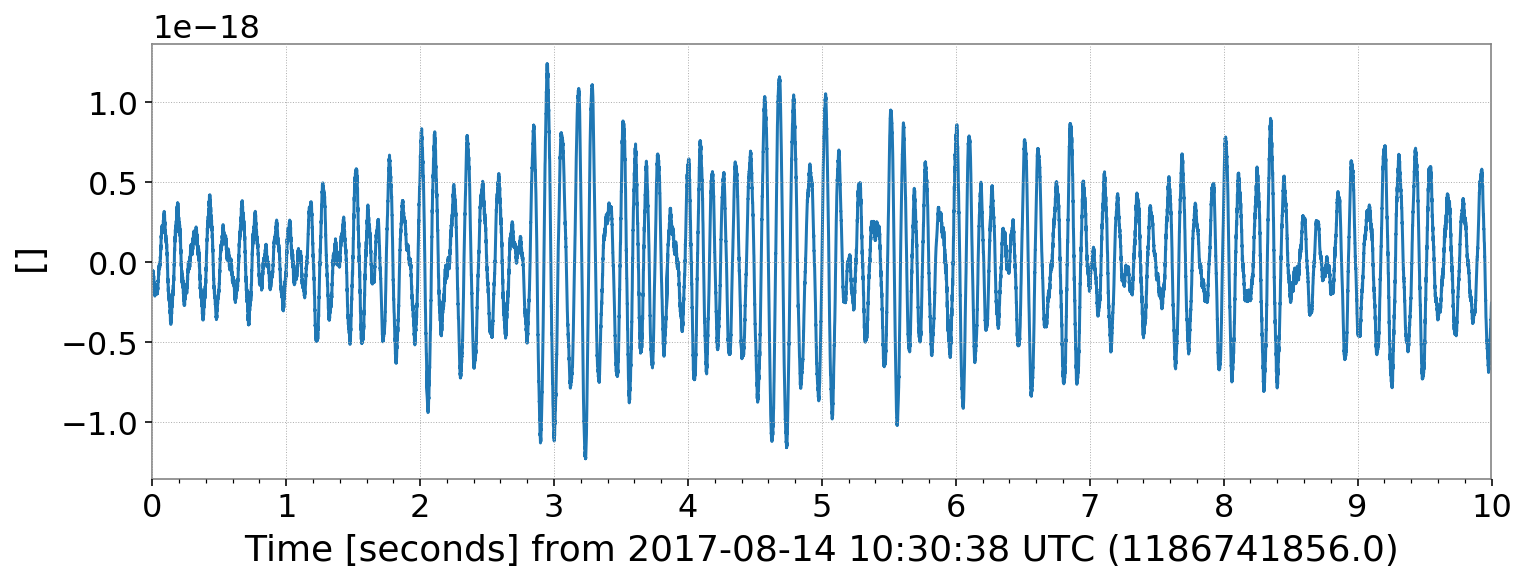

In [15]:
gps = event_gps('GW170814')
print(gps)
!curl -O https://losc.ligo.org//s/events/GW170814/V-V1_LOSC_CLN_4_V1-1186741845-32.hdf5
hdata2 = TimeSeries.read('V-V1_LOSC_CLN_4_V1-1186741845-32.hdf5', start=segment[0], end=segment[1], format='hdf5.losc')
plot2 = hdata2.plot()
plot2.show()